## 数据集：
Video Game Sales(vgsales.csv)
该数据集包含11列共1.66W的游戏名称、类型、发行时间、发布者以及在全球各地的销售额数据。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [2]:
df = pd.read_csv('vgsales.csv')
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## 删除缺失值：

In [3]:
df.dropna(inplace=True)

## 1. 电子游戏市场分析：
### 全球最受欢迎的游戏TOP10

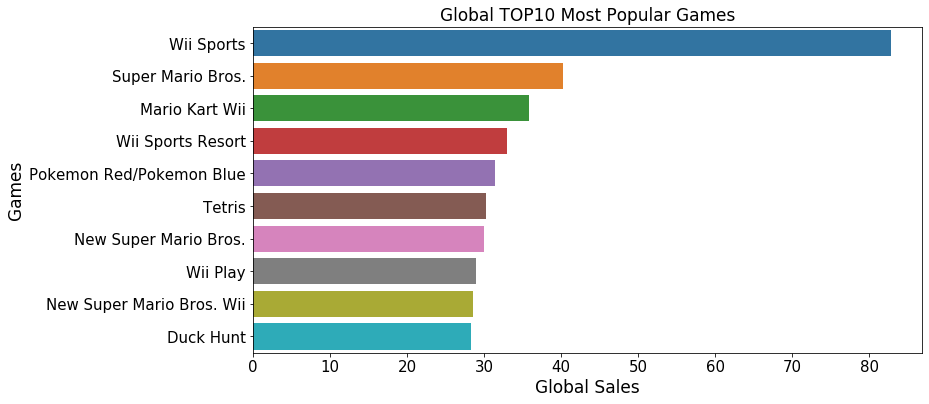

In [4]:
game_df = df.sort_values('Global_Sales', ascending=False, inplace=False)[:10]
game_sales = game_df.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=game_sales.index, x=game_sales.values)
plt.xticks(fontsize=15)
plt.xlabel('Global Sales', fontsize=17)
plt.yticks(fontsize=15)
plt.ylabel('Games', fontsize=17)
plt.title('Global TOP10 Most Popular Games', fontsize=17)
plt.show()

由可视化分析可知，统计年份期间，全球最受欢迎的游戏TOP10:
1. Wii Sports
2. Super Mario Bros.
3. Mario Kart Wii
4. Wii Sports Resort
5. Pokemon Red/Pokemon Blue
6. Tetris
7. New Super Mario Bros.
8. Wii Play
9. New Super Mario Bros. Wii
10. Duck Hunt

### 全球最受欢迎的游戏类型TOP10

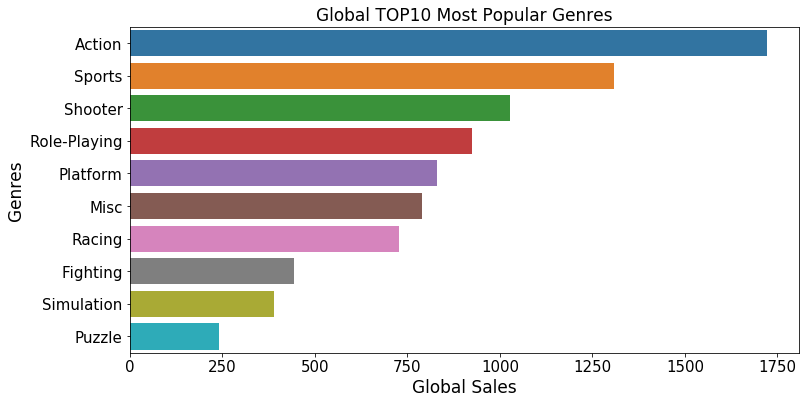

In [5]:
genre_sales = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(y=genre_sales.index, x=genre_sales.values)
plt.xticks(fontsize=15)
plt.xlabel('Global Sales', fontsize=17)
plt.yticks(fontsize=15)
plt.ylabel('Genres', fontsize=17)
plt.title('Global TOP10 Most Popular Genres', fontsize=17)
plt.show()

由可视化分析可知，统计年份期间，全球最受欢迎的游戏类型TOP10:
1. Action 
2. Sports
3. Shooter
4. Rose-Playing
5. Platform
6. Misc
7. Racing
8. Fighting
9. Simulation
10. Puzzle

### 全球最受欢迎的游戏发布平台TOP10

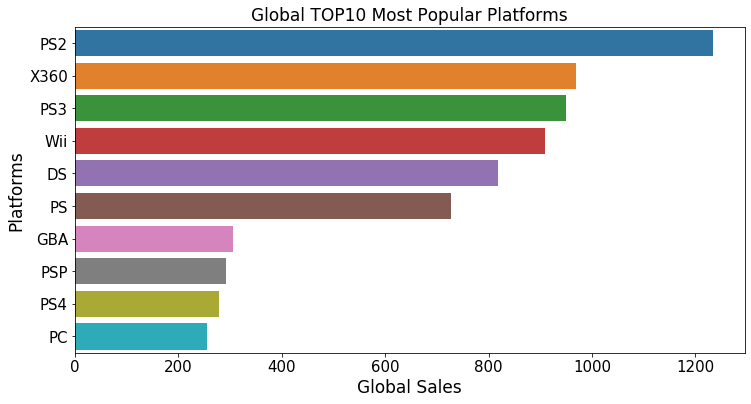

In [6]:
platform_sales = df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(y=platform_sales.index, x=platform_sales.values)
plt.xticks(fontsize=15)
plt.xlabel('Global Sales', fontsize=17)
plt.yticks(fontsize=15)
plt.ylabel('Platforms', fontsize=17)
plt.title('Global TOP10 Most Popular Platforms', fontsize=17)
plt.show()

由可视化分析可知，统计年份期间，全球最受欢迎的游戏发布平台TOP10:
1. PS2
2. X360
3. PS3
4. Wii
5. DS
6. PS
7. GBA
8. PSP
9. PS4
10. PC

### 全球最受欢迎的游戏发行商TOP10

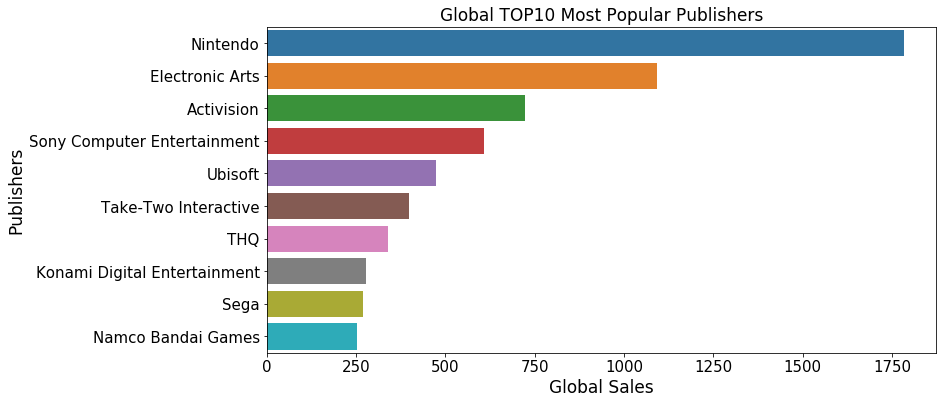

In [7]:
publisher_sales = df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(y=publisher_sales.index, x=publisher_sales.values)
plt.xticks(fontsize=15)
plt.xlabel('Global Sales', fontsize=17)
plt.yticks(fontsize=15)
plt.ylabel('Publishers', fontsize=17)
plt.title('Global TOP10 Most Popular Publishers', fontsize=17)
plt.show()

由可视化分析可知，统计年份期间，全球最受欢迎的游戏发行商TOP10:
1. Nintendo
2. Electronic Arts
3. Activision
4. Sony Computer Entertainment
5. Ubisoft
6. Take_two Interactive 
7. THQ
8. Konami Digital Entertainment
9. Sega
10. Namco Bandai Games

## 2. 预测每年电子游戏销售额：
### 数据预处理

In [8]:
data = df.copy()
data.dropna(inplace=True)
data.drop(['Name', 'Rank'], axis=1, inplace=True)
data['Platform'] = LabelEncoder().fit_transform(data['Platform'].astype('str'))
data['Genre'] = LabelEncoder().fit_transform(data['Genre'].astype('str'))
data['Publisher'] = LabelEncoder().fit_transform(data['Publisher'].astype('str'))
data.head(10)

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37
5,5,1989.0,5,359,23.20,2.26,4.22,0.58,30.26
6,4,2006.0,4,359,11.38,9.23,6.50,2.90,30.01
7,26,2006.0,3,359,14.03,9.20,2.93,2.85,29.02
8,26,2009.0,4,359,14.59,7.06,4.70,2.26,28.62
9,11,1984.0,8,359,26.93,0.63,0.28,0.47,28.31


### 分析并可视化属性之间的相关性

              Platform      Year     Genre  Publisher  NA_Sales  EU_Sales  \
Platform      1.000000  0.167648  0.026665  -0.017938  0.041976  0.046748   
Year          0.167648  1.000000 -0.125366   0.029802 -0.091285  0.006108   
Genre         0.026665 -0.125366  1.000000  -0.051176  0.018057  0.017005   
Publisher    -0.017938  0.029802 -0.051176   1.000000  0.005370  0.013237   
NA_Sales      0.041976 -0.091285  0.018057   0.005370  1.000000  0.768923   
EU_Sales      0.046748  0.006108  0.017005   0.013237  0.768923  1.000000   
JP_Sales     -0.079621 -0.169387  0.030304   0.053019  0.451283  0.436379   
Other_Sales   0.054493  0.041128  0.009802   0.014569  0.634518  0.726256   
Global_Sales  0.027929 -0.074647  0.022215   0.019368  0.941269  0.903264   

              JP_Sales  Other_Sales  Global_Sales  
Platform     -0.079621     0.054493      0.027929  
Year         -0.169387     0.041128     -0.074647  
Genre         0.030304     0.009802      0.022215  
Publisher     0.05301

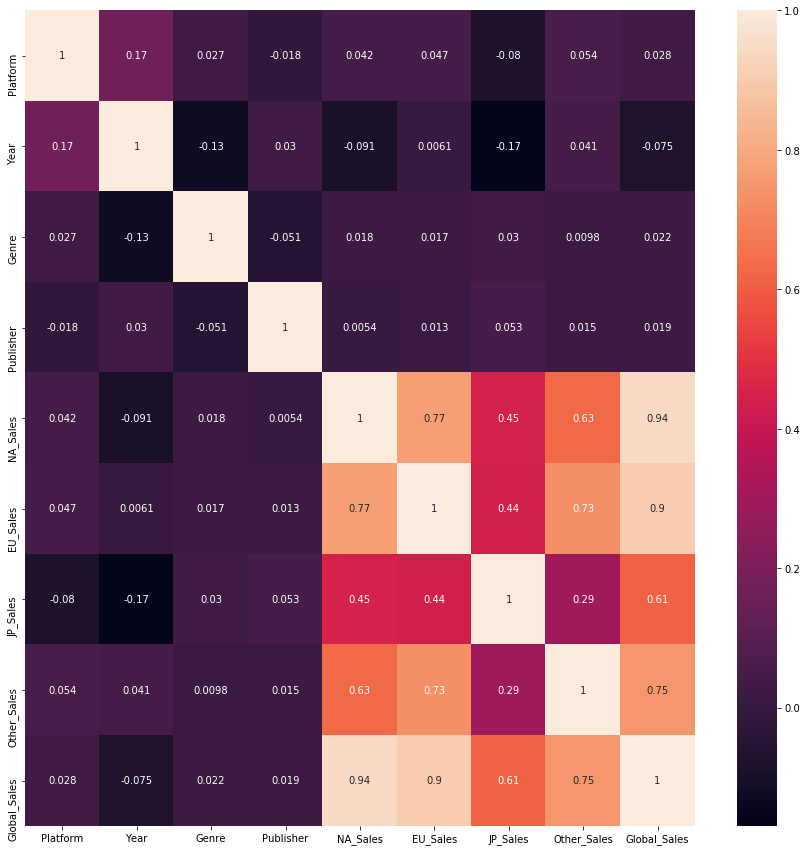

In [9]:
corr = data.corr()
print(corr)
plt.figure(figsize=(15, 15))
ax = sns.heatmap(corr, annot=True)

### 使用线性回归模型进行预测

In [10]:
features = ['Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales']
X = data[features]
Y = data.Global_Sales 
train_X , test_X , train_Y , test_Y = train_test_split(X, Y)
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)
model = LinearRegression()
model.fit(train_X, train_Y)
predictions = model.predict(test_X)
error = mean_squared_error(predictions, test_Y)
print('均方差：'+ str(error))

均方差：0.005531365935110639


### 预测值与真实值的对比可视化分析

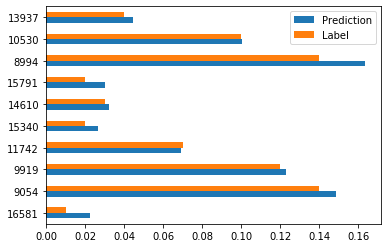

In [11]:
compare = pd.DataFrame({'Prediction': predictions, 'Label': test_Y}).head(10)
compare.plot(kind='barh')
plt.show()

## 3. 可视化应用：
### 全球每年电子游戏销售量走势

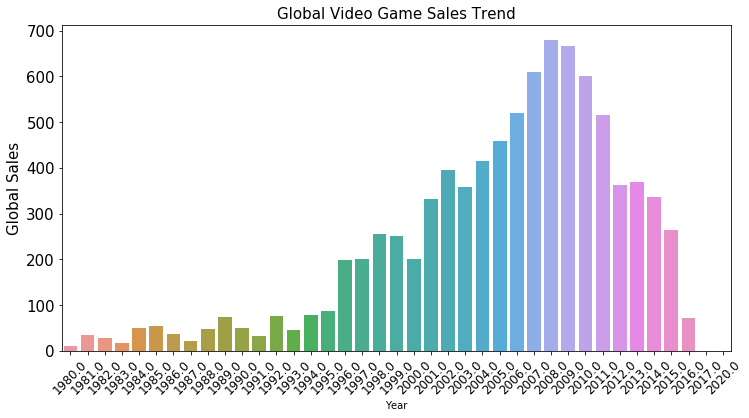

In [12]:
years_sales = df.groupby(['Year'])['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=years_sales.index, y=years_sales.values)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('Global Sales', fontsize=15)
plt.title('Global Video Game Sales Trend', fontsize=15)
plt.show()

电子游戏行业在出现的前15年内发展都较为缓慢；从1996年开始，进入快速增长的阶段，并在2007年达到巅峰；随后由于其他娱乐产业的发展，对电子游戏行业产生了冲击，以至于在2010年与2015年产生了断崖式的下跌，近年来也始终以颓势下跌。